In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

1. design model (input size, output size)
2. construct loss and optimizer
3. training
  - forward pass
  - backward pass
  - update

epoch:  0 loss:  1443.3726806640625
epoch:  100 loss:  498.3951110839844
epoch:  200 loss:  214.65542602539062
epoch:  300 loss:  128.66607666015625
epoch:  400 loss:  102.36676025390625
epoch:  500 loss:  94.25172424316406
epoch:  600 loss:  91.72648620605469
epoch:  700 loss:  90.93441772460938
epoch:  800 loss:  90.68418884277344
epoch:  900 loss:  90.60459899902344


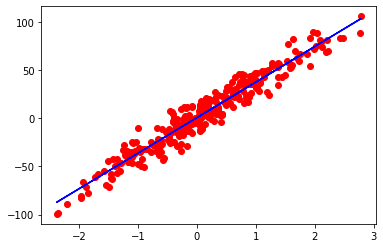

In [38]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=300, n_features=1, noise=10, random_state=4)

# cast to float tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_sanples, n_features = X.shape

# 1. model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2. loss
learning_rate = 0.003

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training
for epoch in range(1000):
  # forward propagation
  y_pred = model(X)

  # loss
  # loss = loss_fn(y_pred, y)
  loss = loss_fn(y, y_pred)

  # back propagation
  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if epoch % 100 == 0:
    print("epoch: ", epoch, "loss: ", loss.item())

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()